# Decicision Tree

Recordar: Aprendizaje Supervisado, ya han sido clasificados

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

# Para representar el árbol de decisión
from six import StringIO  # Capa de compatibilidad entre Python 2 y Python 3
from sklearn.tree import export_graphviz # Visualización de árboles de decisión
from IPython.display import Image # Módulo de gestión de imágenes digitales 
import pydotplus # Envoltorio mejorado del lenguaje "dot" de graphviz 

Etiquetas de los datos a partir del conocimiento del problema
El Dataset de ejemplo proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de la India. La idea es predecir si un paciente puede o no tener diabetes mellitus, con base en datos de tamizaje como la edad, el número de embarazos, los niveles de glucosa, insulina y presión arterial, el grosor de la piel y la "función de pedigree" (asociada a factores genéticos). https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

In [ ]:
# Se define el nombre de las columnas en una lista 
nombre_columnas = ['Embarazos', 'Glucosa', 'Presion Arterial', 'Grosor Piel', 'Insulina', 'Indice Masa Corporal', 'Función de Pedigree', 'Edad', 'Etiqueta']

# Se usa la biblioteca Pandas para cargar el dataset desde un archivo de texto 
# "separado por comas" (CSV), usando los nombres de columna previamente definidos
dataset = pd.read_csv("diabetes.csv", header=1, names=nombre_columnas)dataset.head(10)

In [ ]:
dataset.head(10)

,Embarazos,Glucosa,Presion Arterial,Grosor Piel,Insulina,Indice Masa Corporal,Función de Pedigree,Edad,Etiqueta
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
feature_cols = ['Embarazos', 'Insulina', 'Indice Masa Corporal', 'Edad', 'Glucosa', 'Presion Arterial', 'Función de Pedigree']

X = dataset[feature_cols] # Características
y = dataset.Etiqueta # Variable objetivo
print(X)

     Embarazos  Insulina  ...  Presion Arterial  Función de Pedigree
0            1         0  ...                66                0.351
1            8         0  ...                64                0.672
2            1        94  ...                66                0.167
3            0       168  ...                40                2.288
4            5         0  ...                74                0.201
..         ...       ...  ...               ...                  ...
762         10       180  ...                76                0.171
763          2         0  ...                70                0.340
764          5       112  ...                72                0.245
765          1         0  ...                60                0.349
766          1         0  ...                70                0.315

[767 rows x 7 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% para entrenamiento
print("Tamaño de X_train: {}\nTamaño de y_train: {}".format(X_train.shape, y_train.shape)) #Salida con formato en Python
print("Tamaño de X_test: {}\nTamaño de y_test: {}".format(X_test.shape, y_test.shape))

Tamaño de X_train: (536, 7)
Tamaño de y_train: (536,)
Tamaño de X_test: (231, 7)
Tamaño de y_test: (231,)


**Creación y entrenamiento del modelo**

Se crea un objeto de clase DecisionTreeClassifier y se usa el dataset de entrenamiento para el aprendizaje del árbol de decisión. El árbol entrenado permite obtener las salidas reales del modelo, que serán contrastadas con las salidas esperadas según lo contenido en el dataset original.

In [ ]:
dtree = DecisionTreeClassifier()

# Entrenamiento
dtree = dtree.fit(X_train,y_train)

#Predicción para evaluación
y_pred = dtree.predict(X_test)

Se concatenan las columnas de caraterísticas para prueba (_Xtest), valor esperado de registros de prueba (_ytest) y valores entregados (predichos) por el modelo para los registros de prueba (_ypred). Este último requiere una conversión a series de datos de Pandas a partir del formato de salida del método dtree.predict.

In [ ]:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicción', index=X_test.index)], 
          ignore_index=False, axis=1)

,Embarazos,Insulina,Indice Masa Corporal,Edad,Glucosa,Presion Arterial,Función de Pedigree,Etiqueta,Predicción
285,5,545,38.7,34,155,84,0.619,0,1
101,0,0,22.5,21,125,96,0.262,0,0
581,12,0,26.5,62,121,78,0.259,0,1
352,1,43,27.2,24,90,62,0.580,0,0
632,1,183,27.5,22,128,82,0.115,0,0
...,...,...,...,...,...,...,...,...,...
241,3,0,25.6,22,139,54,0.402,1,0
599,1,0,27.1,24,108,88,0.400,0,0
649,1,100,25.2,23,91,54,0.234,0,0
11,10,0,27.1,57,139,80,1.441,0,0


Se imprimen los resultados de desempeño obtenidos mediante validación cruzada

In [ ]:
cv_scores = cross_val_score(dtree, X_train, y_train, cv=5)

# Escribe en pantalla los desempeños ("accuracy") para cada "pliegue" (fold)
print (cv_scores);

# Escribe en pantalla el promedio de la métrica "accuracy" en el entrenamiento 
print("Exactitud en el entrenamiento", np.average(cv_scores))

# Escribe en pantalla la métrica "accuracy" para prueba (datos no usados en el entrenamiento)
print("Exactitud (accuracy) en prueba (testing):",metrics.accuracy_score(y_test, y_pred))

[0.72222222 0.70093458 0.6728972  0.75700935 0.71962617]
Exactitud en el entrenamiento 0.7145379023883697
Exactitud (accuracy) en prueba (testing): 0.7012987012987013


In [ ]:
print(X_test.iloc[210])
print(y_test.iloc[210])

Embarazos                3.000
Insulina                 0.000
Indice Masa Corporal    42.700
Edad                    21.000
Glucosa                 90.000
Presion Arterial        78.000
Función de Pedigree      0.559
Name: 353, dtype: float64
0


In [ ]:
data = {'Embarazos':[2],'Insulina':[120.000],'Indice Masa Corporal':[20],'Edad':[32.000],'Glucosa':[190],'Presion Arterial':[100],'Función de Pedigree':[0.75]}

#PUEDE PREDECIR CON EL QUERY
query=pd.DataFrame(data)

nueva_clasificacion=dtree.predict(query)

print("Clase: ",nueva_clasificacion)

Clase:  [0]


Visualización del modelo obtenido

El siguiente segmento de código grafica el árbol de decisión obtenido

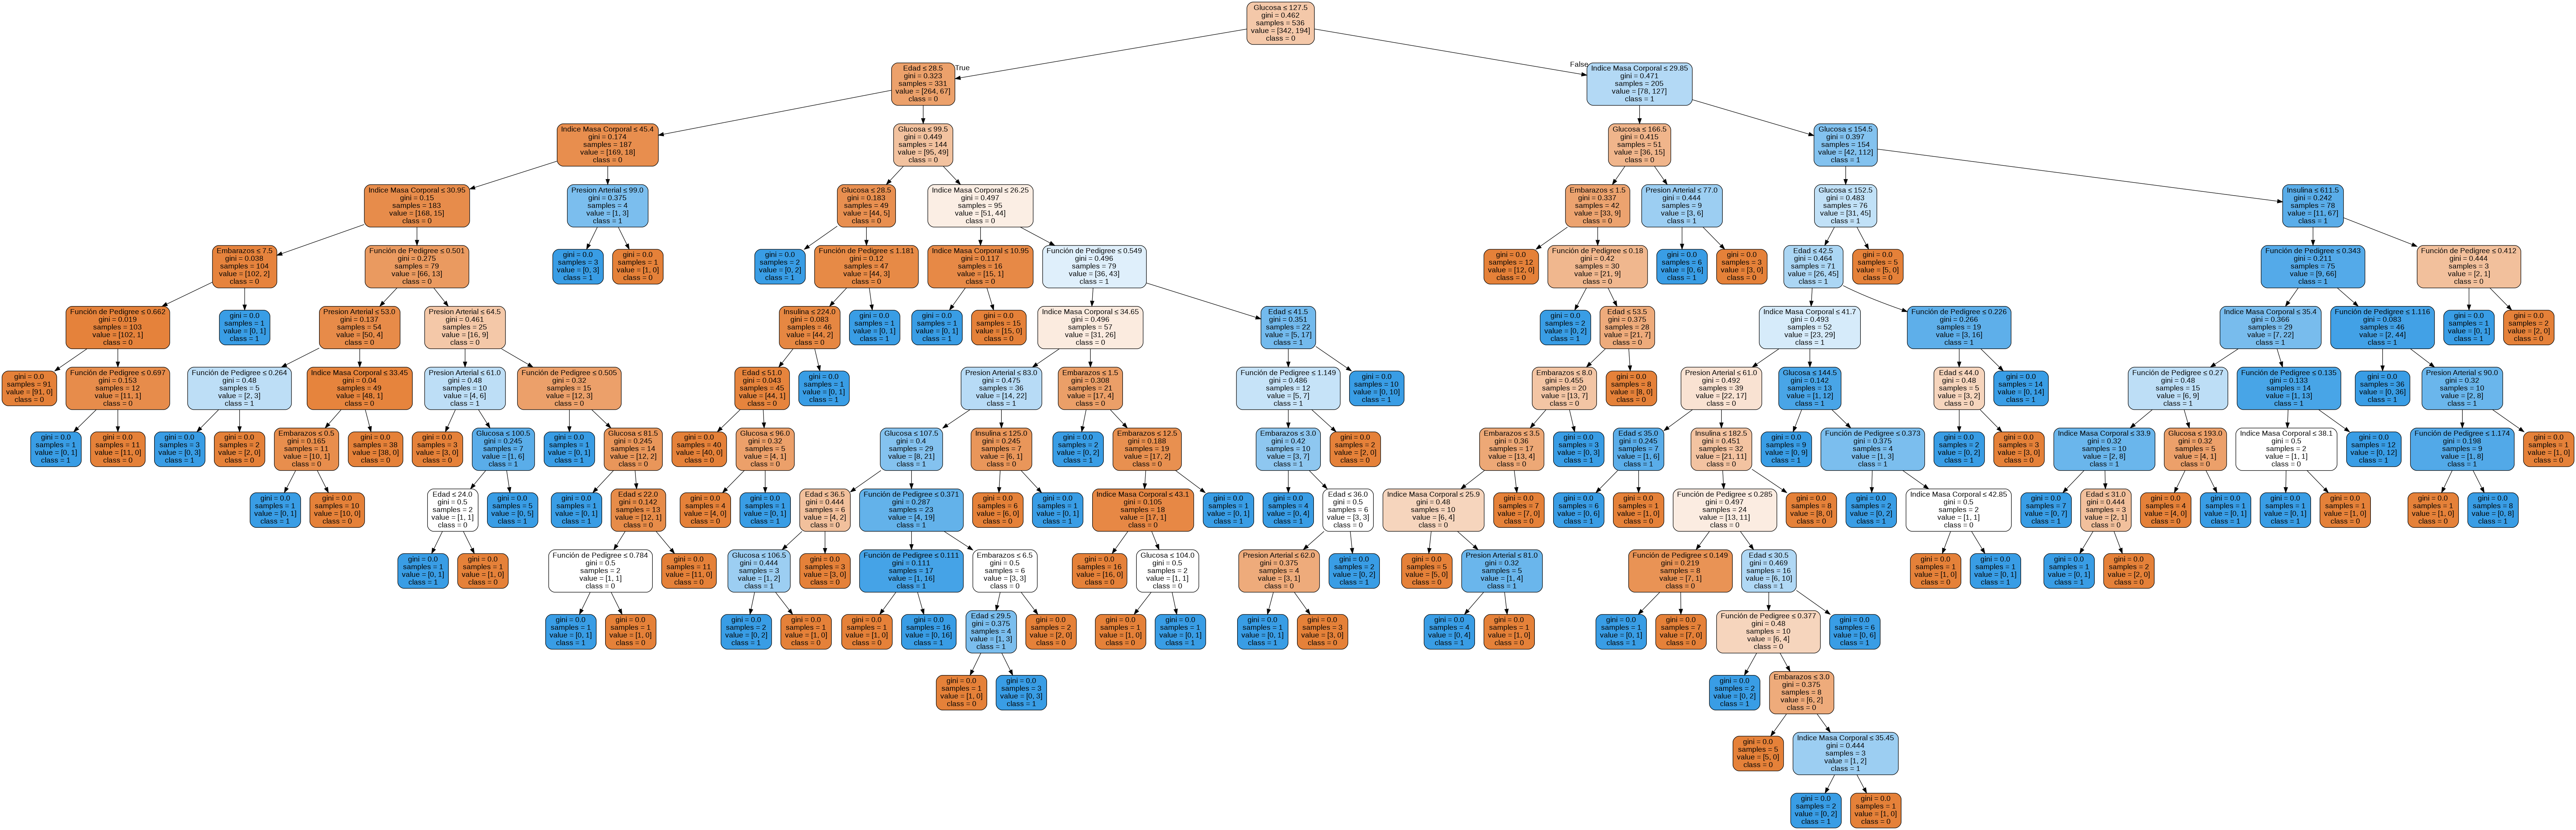

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())